In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\91885\\Downloads\\creditcard\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

EDA

In [3]:
df.isnull().values.any()

False

C:\Users\91885\AppData\Local\Temp\ipykernel_6712\965354911.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes=pd.value_counts(df['Class'],sort=True)


Text(0.5, 1.0, 'Transaction Class Ditribution')

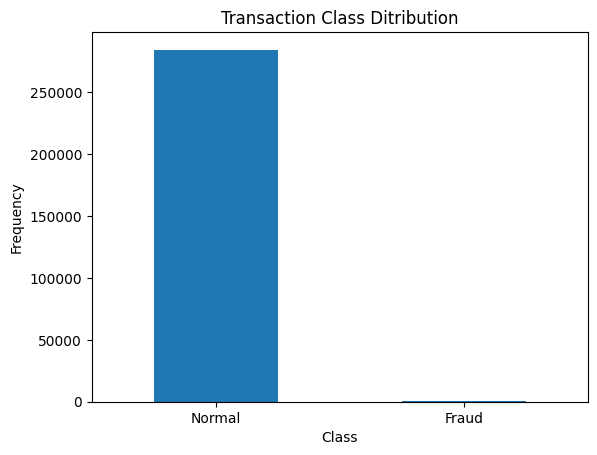

In [4]:
import matplotlib.pyplot as plt
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Transaction Class Ditribution")

In [5]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]
print(normal.shape,fraud.shape)

(284315, 31) (492, 31)


In [6]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

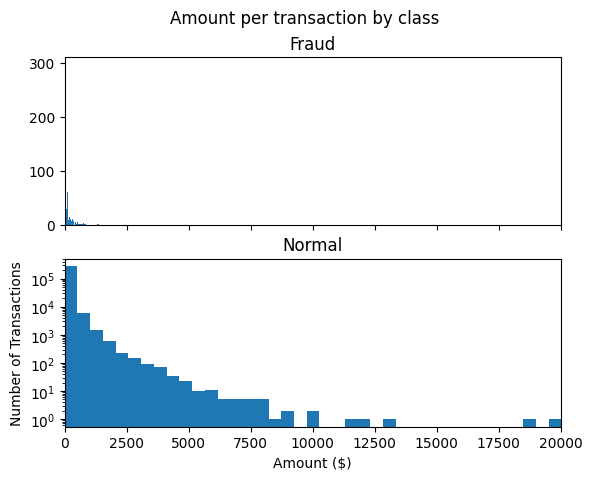

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

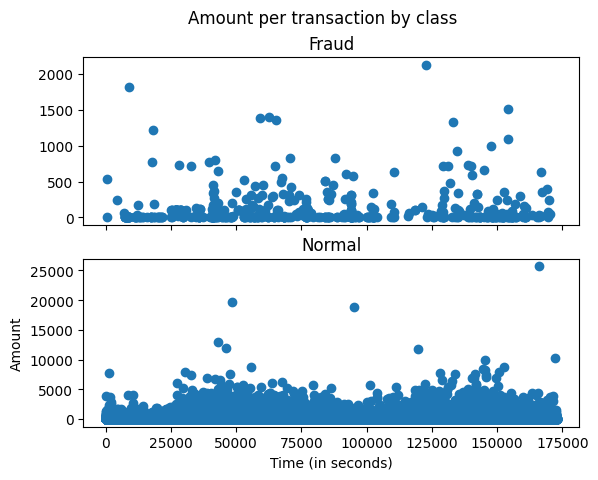

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
df1=df.sample(frac=0.1,random_state=1)
df1.shape

(28481, 31)

In [17]:
#Determine the number of fraud and valid transactions in the dataset
fraud=df1[df1['Class']==1]
normal=df1[df1['Class']==0]
outliers_fraction=len(fraud)/len(normal)
print(outliers_fraction)
print(f"no.of fraud cases:{len(fraud)}")
print(f"no. of normal cases:{len(normal)}")

0.0017234102419808666
no.of fraud cases:49
no. of normal cases:28432


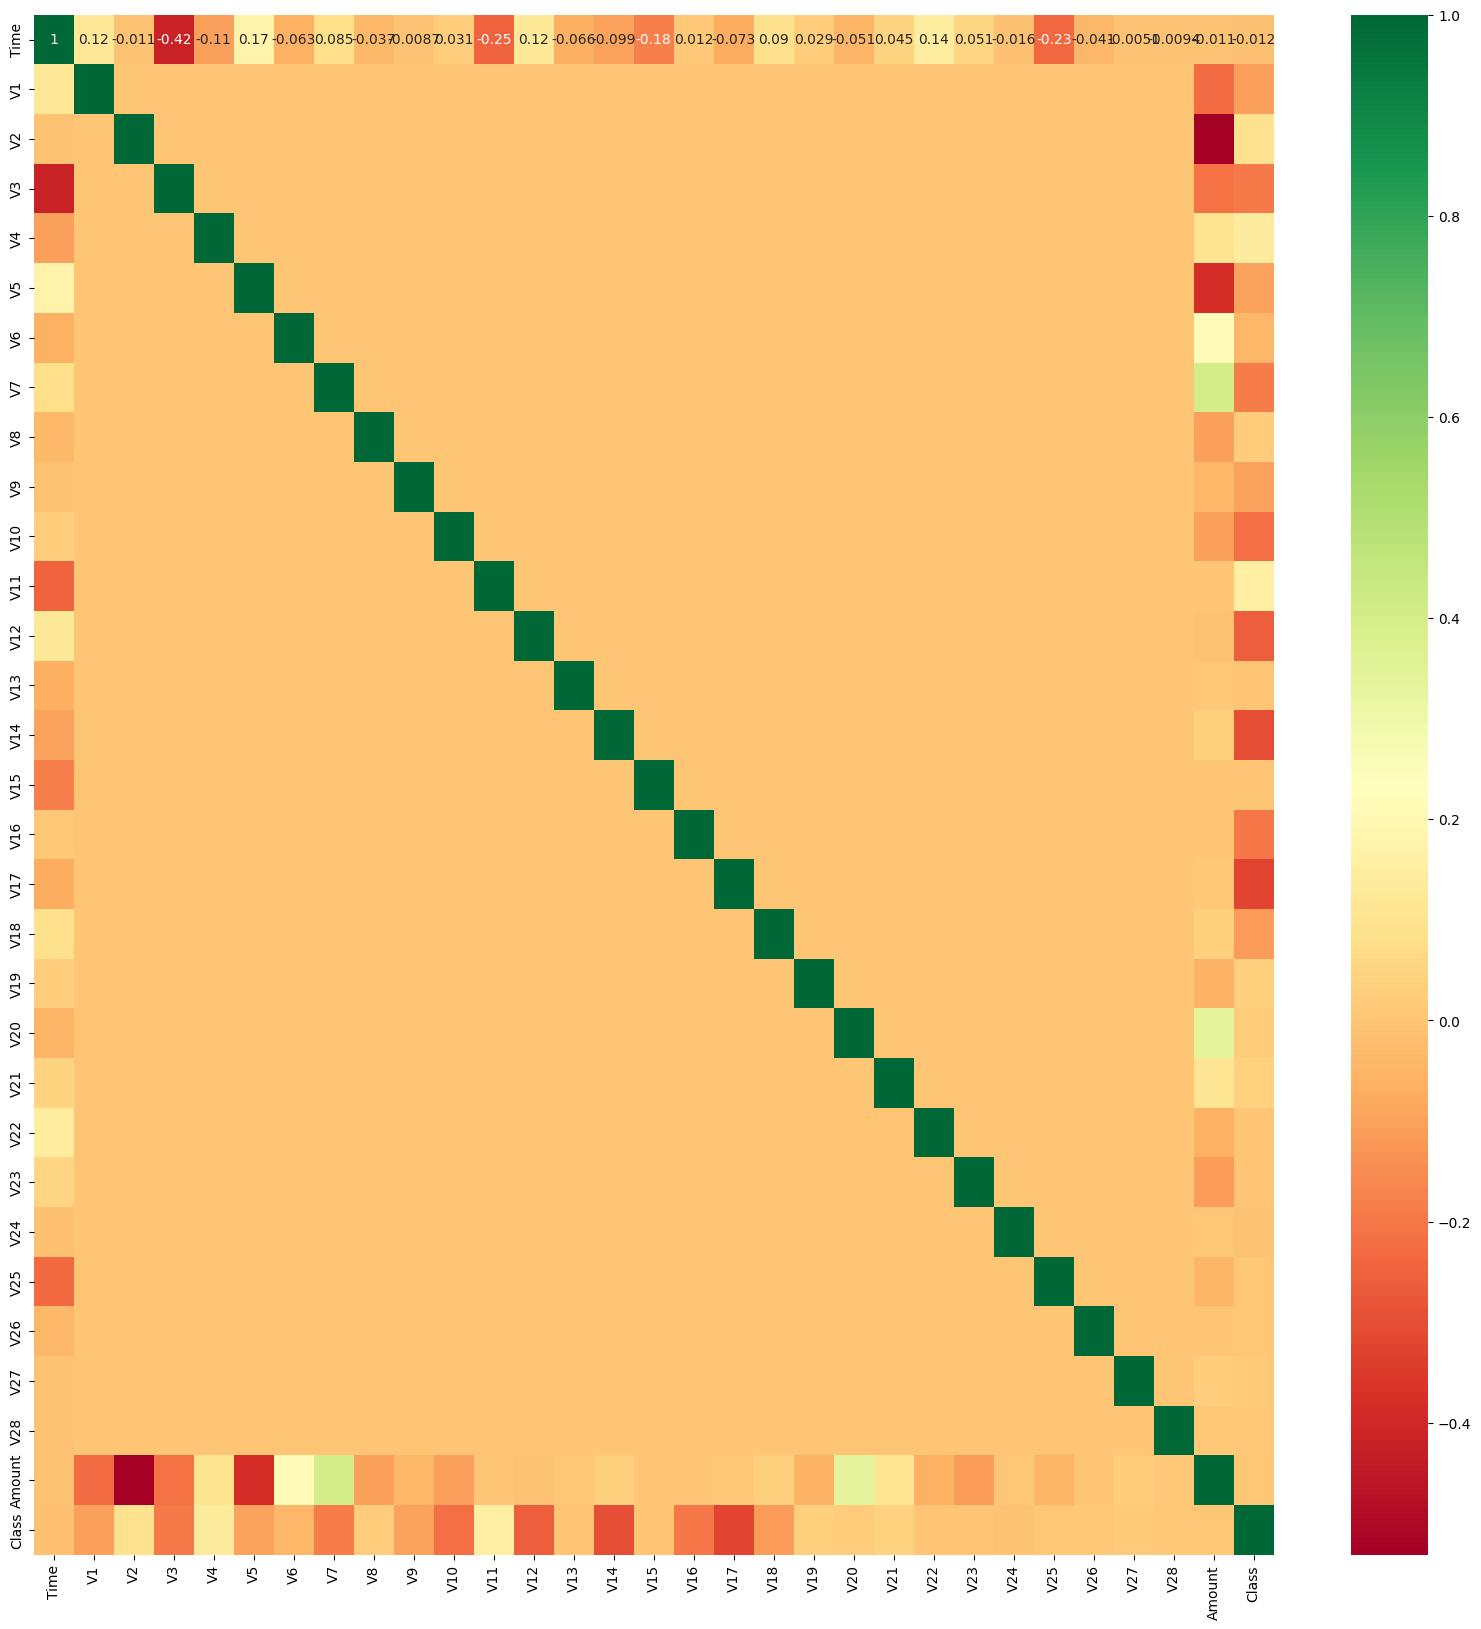

In [31]:
import seaborn as sns
corrmat=df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
import numpy as np
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

[[0.37454012 0.95071431 0.73199394 ... 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 ... 0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 ... 0.63755747 0.88721274 0.47221493]
 ...
 [0.9759548  0.00835751 0.39654879 ... 0.27124459 0.49869169 0.0681891 ]
 [0.36655003 0.30495987 0.25223322 ... 0.42485128 0.20312083 0.42905276]
 [0.97759176 0.38214378 0.07343188 ... 0.04355135 0.6165196  0.17670918]]
(28481, 30)
(28481,)


In [48]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
model=IsolationForest(n_estimators=100,max_samples=len(X),contamination=outliers_fraction,random_state=state,verbose=0)
ycap=model.fit_predict(X)
score_prediction=model.decision_function(X)
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
ycap[ycap == 1] = 0
ycap[ycap == -1] = 1
n_errors = (ycap != Y).sum()
# Run Classification Metrics
print(f"Isolation Forest fraud cases:{n_errors}")
print("Accuracy Score :")
print(accuracy_score(Y,ycap))
print("Classification Report :")
print(classification_report(Y,ycap))

Isolation Forest fraud cases:75
Accuracy Score :
0.9973666654962958
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

